In [1]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import h5py
import pandas as pd
import numpy as np

/home/anrunw/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/anrunw/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/anrunw/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/anrunw/anaconda3/envs/tensor

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [5]:
dg = pd.read_hdf('train.h5', 'table')

NameError: name 'pd' is not defined

In [6]:
y_train = dg['is_signal_new'].to_numpy()

NameError: name 'dg' is not defined

In [2]:
dg = dg.drop(['ttv', 'truthE', 'truthPX', 'truthPY', 'truthPZ'], axis = 1)

NameError: name 'dg' is not defined

In [3]:
dg = dg.drop(['is_signal_new'], axis = 1)

NameError: name 'dg' is not defined

In [4]:
X_train = dg.to_numpy()

NameError: name 'dg' is not defined

In [48]:
Inputs = Input(shape=(800))
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name='fc1_relu')(Inputs)
y = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name = 'fc2')(x)
z = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name = 'fc3')(y)
a = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(z)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(a)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 800)]             0         
_________________________________________________________________
fc1_relu (Dense)             (None, 64)                51264     
_________________________________________________________________
fc2 (Dense)                  (None, 32)                2080      
_________________________________________________________________
fc3 (Dense)                  (None, 32)                1056      
_________________________________________________________________
fc4 (Dense)                  (None, 32)                1056      
_________________________________________________________________
output_sigmoid (Dense)       (None, 1)                 33        
Total params: 55,489
Trainable params: 55,489
Non-trainable params: 0
_______________________________________________________

In [49]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
X_train

array([[ 474.07114 , -250.34703 , -223.65196 , ...,    0.      ,
           0.      ,    0.      ],
       [ 150.50453 ,  120.06239 ,   76.852005, ...,    0.      ,
           0.      ,    0.      ],
       [ 251.64539 ,   10.427651, -147.57375 , ...,    0.      ,
           0.      ,    0.      ],
       ...,
       [  61.417538,   42.90129 ,   43.947723, ...,    0.      ,
           0.      ,    0.      ],
       [ 261.2153  ,   12.780115, -132.6992  , ...,    0.      ,
           0.      ,    0.      ],
       [ 221.00002 ,  -32.45829 , -127.960335, ...,    0.      ,
           0.      ,    0.      ]], dtype=float32)

In [51]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 100, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/100
887/887 [==============================] - 9s 10ms/step - loss: 0.5731 - accuracy: 0.6943 - val_loss: 0.5410 - val_accuracy: 0.7147
Epoch 2/100
887/887 [==============================] - 8s 9ms/step - loss: 0.5309 - accuracy: 0.7199 - val_loss: 0.5252 - val_accuracy: 0.7244
Epoch 3/100
887/887 [==============================] - 7s 8ms/step - loss: 0.5139 - accuracy: 0.7320 - val_loss: 0.5060 - val_accuracy: 0.7386
Epoch 4/100
887/887 [==============================] - 7s 8ms/step - loss: 0.4952 - accuracy: 0.7473 - val_loss: 0.4897 - val_accuracy: 0.7523
Epoch 5/100
887/887 [==============================] - 7s 7ms/step - loss: 0.4778 - accuracy: 0.7636 - val_loss: 0.4740 - val_accuracy: 0.7698
Epoch 6/100
887/887 [==============================] - 6s 7ms/step - loss: 0.4626 - accuracy: 0.7780 - val_loss: 0.4630 - val_accuracy: 0.7790
Epoch 7/100
887/887 [==============================] - 7s 8ms/step - loss: 0.4498 - accuracy: 0.7899 - val_loss: 0.4465 - val_accuracy: 0.795

In [52]:
import matplotlib.pyplot as plt

In [53]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

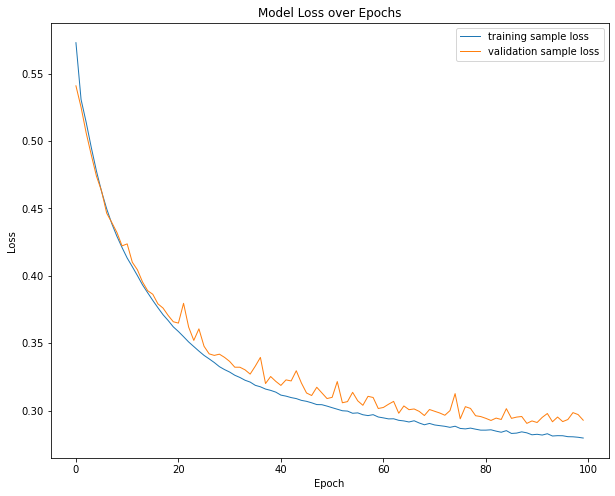

In [54]:
learningCurve(history)

In [55]:
labels = ['top']

In [58]:
dg = pd.read_hdf('test.h5', 'table')

y_test = dg['is_signal_new'].to_numpy()

dg = dg.drop(['ttv', 'truthE', 'truthPX', 'truthPY', 'truthPZ'], axis = 1)

dg = dg.drop(['is_signal_new'], axis = 1)

X_test = dg.to_numpy()

TypeError: cannot create a storer if the object is not existing nor a value are passed

In [38]:
def makeRoc(features_val, labels, labels_val, model):
    print('in makeRoc()')
    if 'j_index' in labels: labels.remove('j_index')

    predict_test = model.predict(features_val)

    df = pd.DataFrame()
    
    fpr = {}
    tpr = {}
    auc1 = {}
    
    plt.figure()       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = predict_test[:,i]
        
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])

        auc1[label] = auc(fpr[label], tpr[label])
            
        plt.plot(tpr[label],fpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.semilogy()
    plt.xlabel("Signal Efficiency")
    plt.ylabel("Background Efficiency")
    plt.ylim(0.001,1)
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.figtext(0.25, 0.90,'hls4ml',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    plt.savefig("mygraph.png")
#     plt.savefig('%s/ROC.pdf'%(options.outputDir))
#     plt.savefig('%s/ROC.pdf' %(outputDir))
    return predict_test

In [40]:
y_pred = makeRoc(x_test, labels, y_test, model)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 720x576 with 0 Axes>